# Discrete Probability Distributions - Binomial and Poisson

In [4]:
import math
import matplotlib.pyplot as plt

In [6]:
#Factorials
#Factorials = n! = Multiply a number by all the integers below it 
#5! = 5x4x3x2x1 = 120
#0! = 1, 1! = 1

def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        result = 1
        for i in range(2, n + 1): #n + 1 since range stops before last number
            result *= i #inplace multiplication
        return result
    
factorial(5)

120

In [8]:
#Combinations
#Combinations = How many sets of k-size can be made out of n-items, if order doesnt matter

def combination(n, k):
    combinations = factorial(n) / ((factorial(k) * factorial(n - k)))
    return int(combinations)

combination(10,4)

210

# The Binomial Distribution 

In [11]:
#Alternatively...
print(math.factorial(5))
print(math.comb(10,4))

120
210


In [21]:
#Creating a binomial formula function
#x = number of successes, n = number of trials, pi = probability of success
def binomial(x,n,pi):
    c = combination(n,x)
    p = c * (pi**x)*(1-pi)**(n-x)
    return p

In [111]:
#Creating a probability distribution
successes = [0,1,2,3,4,5,6,7,8,9,10]
pi = 0.1
n = 10
probs = []

for i in successes:
    p = binomial(i,n,pi)
    probs.append(p)
    
print(probs)

[0.3486784401000001, 0.3874204890000001, 0.19371024450000007, 0.05739562800000002, 0.011160261000000003, 0.0014880348000000005, 0.00013778100000000007, 8.748000000000003e-06, 3.6450000000000023e-07, 9.000000000000004e-09, 1.0000000000000006e-10]


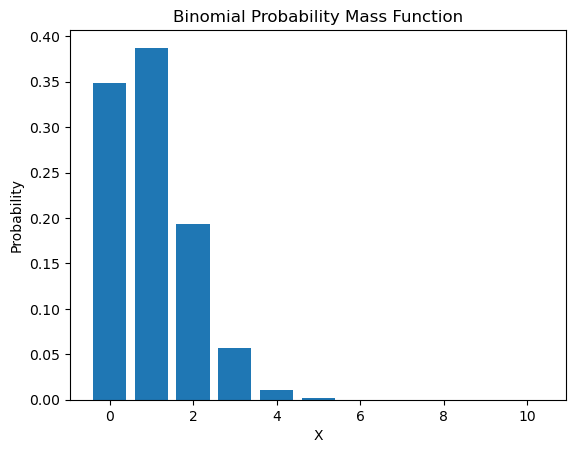

In [113]:
#Plotting the distribution 
plt.bar(successes, probs)
plt.title('Binomial Probability Mass Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

In [150]:
#p(x=2), 10 trials, 2 successes, probability of success = 10%
n = 10
x = 2
pi = 0.10
binomial(x,n,pi)

0.19371024450000007

In [47]:
#p(x<2)
n = 10
x = 2
pi = 0.10
p = 0

for i in range(0, x): #Use x for p(x<X) and x+1 for p(x<=X)
    p += binomial(i, n, pi)

print(p)

0.7360989291000002


In [45]:
#p(x<=2)
n = 10
x = 2
pi = 0.10
p = 0

for i in range(0, x + 1): 
    p += binomial(i,n,pi)

print(p)

0.9298091736000003


In [120]:
#(x>2)
n = 10
x = 2
pi = 0.10
c = 0

for i in range(0, x + 1):
    c += binomial(i, n, pi)
    p = 1 - c
    
print(p)

0.07019082639999974


In [122]:
#(x>=2)
n = 10
x = 2
pi = 0.10
c = 0

for i in range(0, x):
    c += binomial(i, n, pi)
    p = 1 - c
    
print(p)

0.2639010708999998


In [138]:
#Custom function to find binomially distributed probabilities
def binom_prob_finder(n, x, pi, test_type):
    if test_type == "=":
        p = binomial(x, n, pi)
    elif test_type == "x>=":
        c = 0
        for i in range(0, x):
            c += binomial(i, n, pi)
            p = 1 - c
    elif test_type == "x>":
        c = 0
        for i in range(0, x + 1):
            c += binomial(i, n, pi)
            p = 1 - c
    elif test_type == "x<=":
        p = 0
        for i in range(0, x + 1): #Use x+1 for p(x<=X) and x for p(x<X)
            p += binomial(i,n,pi)
    elif test_type == "x<":
        p = 0
        for i in range(0, x):
            p += binomial(i, n, pi)
    return p

print(binom_prob_finder(10, 2, 0.1, "="))
print(binom_prob_finder(10, 2, 0.1, "x>"))
print(binom_prob_finder(10, 2, 0.1, "x>="))
print(binom_prob_finder(10, 2, 0.1, "x<"))
print(binom_prob_finder(10, 2, 0.1, "x<="))

0.19371024450000007
0.07019082639999974
0.2639010708999998
0.7360989291000002
0.9298091736000003


# The Poisson Distribution

In [144]:
#Creating a poisson formula function
#l = lambda = average rate of events, x = number of events

def poisson(l,x):
    numerator = (l**k)*(math.exp(-l))
    denominator = factorial(x)
    p = numerator / denominator
    return p

In [192]:
#Creating a probability mass function
x = [0,1,2,3,4,5,6,7,8,9,10]
l = 2

ps = []

for i in x:
    ps.append(poisson(l,i))

print(ps)

[0.1353352832366127, 0.2706705664732254, 0.2706705664732254, 0.1804470443154836, 0.0902235221577418, 0.03608940886309672, 0.012029802954365574, 0.0034370865583901638, 0.0008592716395975409, 0.00019094925324389798, 3.8189850648779595e-05]


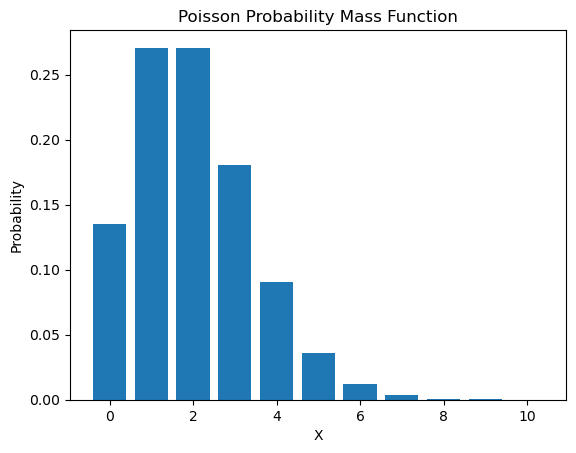

In [194]:
#Plotting the probability mass function
plt.bar(x, ps)
plt.title('Poisson Probability Mass Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

In [172]:
#Calculating probabilities - lambda = 5
#(x=3)
x=3
l=5

poisson(l,x)

0.14037389581428056

In [180]:
#p(x<3)
x=3
l=5

p=0
for i in range(0, x): #Use x+1 for p(x<=X) and x for p(x<X)
    p += poisson(l,i)
    
p  

0.12465201948308113

In [182]:
#p(x<=3)
x=3
l=5

p=0
for i in range(0, x+1): 
    p += poisson(l,i)
    
p  

0.2650259152973617

In [186]:
#p(x>3)
x=3
l=5

p=0
c=0

for i in range(0, x+1): 
    c += poisson(l,i)
    p = 1 - c
    
p 

0.7349740847026383

In [188]:
#p(x>=3)
x=3
l=5

p=0
c=0

for i in range(0, x): 
    c += poisson(l,i)
    p = 1 - c
    
p  

0.8753479805169189

In [220]:
#The easy way...
from scipy.stats import poisson
from scipy.stats import binom

#Binomial Probability Mass Fuction
#prob = binom.pmf(k, n, p)

#Binomial Cumulative Distribution Function
#cum_prob = binom.cdf(k, n, p)

#Poisson Probability Mass Fuction
#prob = poisson.pmf(k, mu)

#Poisson Cumulative Distribution Fuction
#cum_prob = poisson.cdf(k, mu)

0.99144
